
# Лабораторная работа 3
## Метрические методы классификации

In [1]:
import pandas as pd
import numpy as np

data_source = '../datasets/iris/iris.data'
d = pd.read_table(data_source, delimiter=',', 
                  header=None, 
                  names=['sepal_length','sepal_width',
                         'petal_length','petal_width','answer'])
d.head()

,sepal_length,sepal_width,petal_length,petal_width,answer
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
answer          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


D:\ml\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


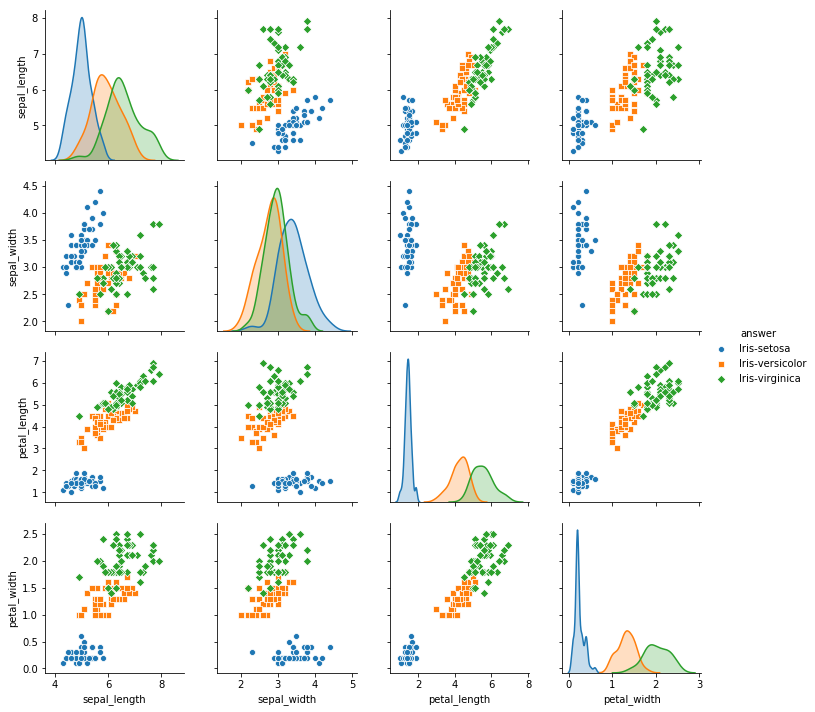

In [3]:
import seaborn as sb
%matplotlib inline
sb.pairplot(d, hue='answer', markers=["o", "s", "D"])


In [4]:
from sklearn.neighbors import KNeighborsClassifier

X_train = d[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y_train = d['answer']

K = 3

# Создание и настройка классификатора
knn = KNeighborsClassifier(n_neighbors=K)
# построение модели классификатора (процедура обучения)
knn.fit(X_train, y_train)

# Использование классификатора
# Объявление признаков объекта
X_test = np.array([[1.2, 1.0, 2.8, 1.2]])
# Получение ответа для нового объекта
target = knn.predict(X_test)
print(target)


['Iris-versicolor']


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_holdout, y_train, y_holdout = \
            train_test_split(d.ix[ :, 0:4 ], 
                             d['answer'], 
                             test_size=0.3, 
                             random_state=17)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_holdout)
accur = accuracy_score(y_holdout, knn_pred)
print('accuracy: ', accur)

accuracy:  0.9777777777777777


D:\ml\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


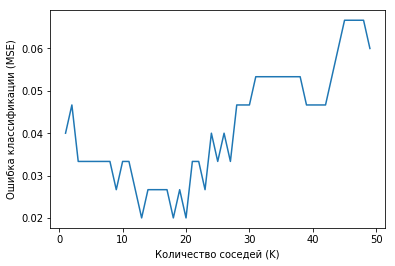

Оптимальные значения K:  [13, 18, 20]


In [7]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Значения параметра K
k_list = list(range(1,50))
# Пустой список для хранения значений точности
cv_scores = []
# В цикле проходим все значения K
for K in k_list:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, d.iloc[ : , 0:4 ], d['answer'], cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Вычисляем ошибку (misclassification error)
MSE = [1-x for x in cv_scores]

# Строим график
plt.plot(k_list, MSE)
plt.xlabel('Количество соседей (K)');
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

# Ищем минимум
k_min = min(MSE)

# Пробуем найти прочие минимумы (если их несколько)
all_k_min = []
for i in range(len(MSE)):
    if MSE[i] <= k_min:
        all_k_min.append(k_list[i])

# печатаем все K, оптимальные для модели
print('Оптимальные значения K: ', all_k_min)


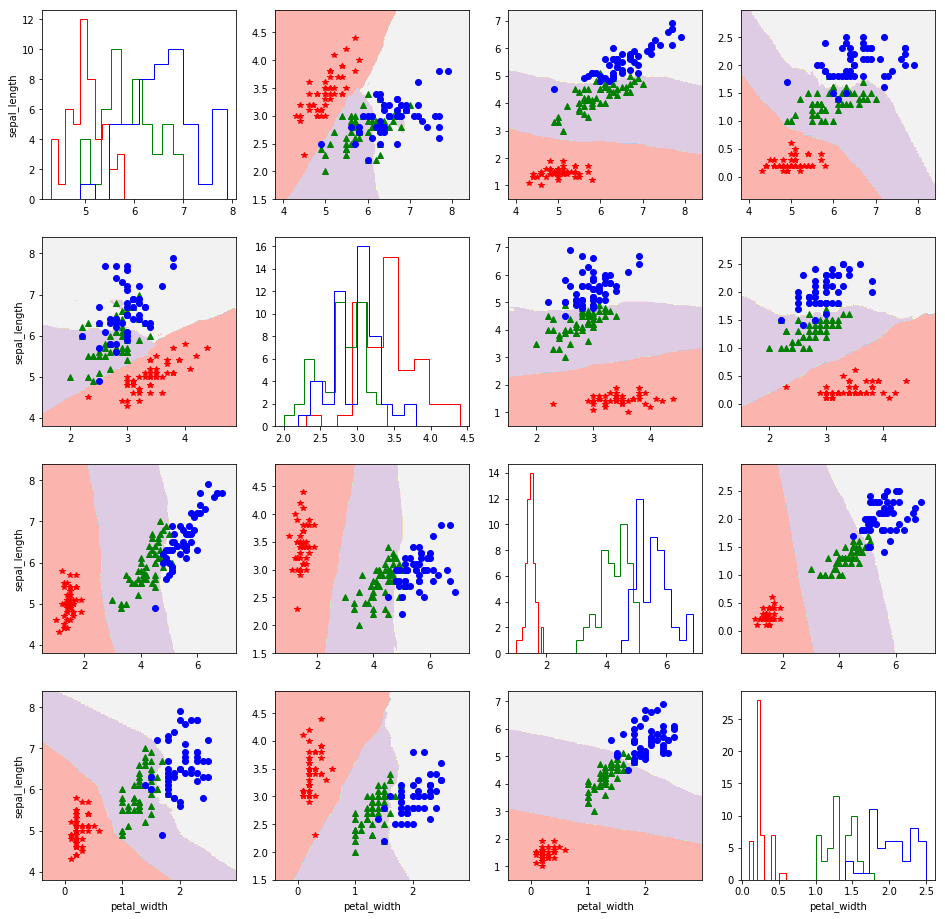

In [9]:
dX = d.iloc[:,0:4]
dy = d['answer']

plot_markers = ['r*', 'g^', 'bo']
answers = dy.unique()

# Создаем подграфики для каждой пары признаков
f, places = plt.subplots(4, 4, figsize=(16,16))

fmin = dX.min()-0.5
fmax = dX.max()+0.5
plot_step = 0.02  

# Обходим все subplot
for i in range(0,4):
    for j in range(0,4):

        # Строим решающие границы 
        if(i != j):
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
                               np.arange(fmin[j], fmax[j], plot_step))
            model = KNeighborsClassifier(n_neighbors=13)
            model.fit(dX.iloc[:, [i,j]], dy)
            p = model.predict(np.c_[xx.ravel(), yy.ravel()])
            p = p.reshape(xx.shape)
            p[p==answers[0]] = 0
            p[p==answers[1]] = 1
            p[p==answers[2]] = 2
            places[i,j].contourf(xx, yy, p, cmap='Pastel1') 
      
        # Обход всех классов
        for id_answer in range(len(answers)):
            idx = np.where(dy == answers[id_answer])
            if i==j:
                places[i, j].hist(dX.iloc[idx].iloc[:,i],
                                  color=plot_markers[id_answer][0],
                                 histtype = 'step')
            else:
                places[i, j].plot(dX.iloc[idx].iloc[:,i], dX.iloc[idx].iloc[:,j], 
                                  plot_markers[id_answer], 
                                  label=answers[id_answer], markersize=6)
        
        if j==0:
            places[i, j].set_ylabel(dX.columns[j])
        
        if i==3:
            places[i, j].set_xlabel(dX.columns[i])
        
    
        